# Une régression logistique sur le jeu de données Iris

Petite manip bonus qui n'a rien à voir avec le sujet : afficher une photo d'iris en haut de ce notebook.

## Importer les librairies

Vous aurez besoin de pandas, matplotlib, seaborn (et numpy ?)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
import pandas_profiling

## Importer les données et commencer à explorer le dataset

In [5]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.describe(include="all")

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## Analyse de données : visualisation

Faire apparaître sur une même figure (idéalement un même graphique !) la relation entre chaque feature et chaque espèce d'iris.

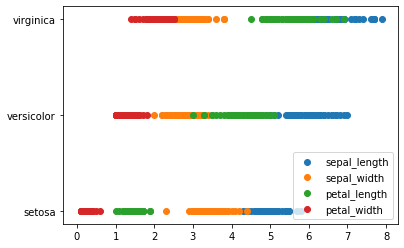

In [7]:
plt.scatter(df['sepal_length'],df['species'])
plt.scatter(df['sepal_width'],df['species'])
plt.scatter(df['petal_length'],df['species'])
plt.scatter(df['petal_width'],df['species'])
plt.legend(df.columns)
plt.show()


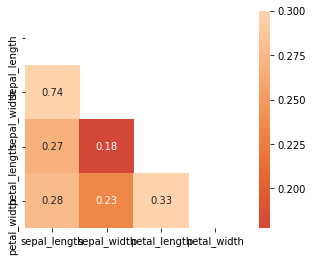

In [9]:
corr = df[df['species'] == 'setosa'].corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show(ax)

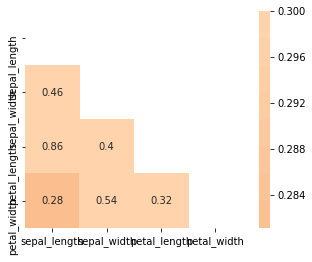

In [10]:
corr = df[df['species'] == 'virginica'].corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show(ax)


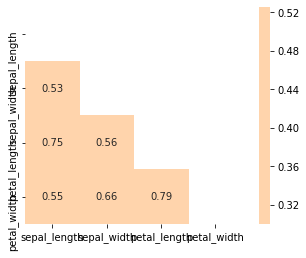

In [11]:
corr = df[df['species'] == 'versicolor'].corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show(ax)

In [12]:
pandas_profiling.ProfileReport(df)

C:\Users\Shadow\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,5
Number of observations,150
Total Missing (%),0.0%
Total size in memory,6.0 KiB
Average record size in memory,40.9 B
Numeric,3
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,1


## Création d'un train set et test set

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

reg_log2 = LogisticRegression(solver='lbfgs', multi_class='auto', penalty ='none', random_state = 0)
reg_log2.fit(X, y)


X_train, X_test, y_train, y_test = train_test_split(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy(), df['species'].to_numpy(), test_size = 0.2, random_state=5)

reg_log2 = LogisticRegression(solver='lbfgs', multi_class='auto', penalty ='none', random_state = 0)
reg_log2.fit(X, y)

## Création et entraînement du modèle

In [14]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
pred =  clf.predict(X_test)


C:\Users\Shadow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shadow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [15]:
print('Score : %s'%(clf.score(X_test, y_test)))
M = confusion_matrix(y_test, pred)
print(pd.DataFrame(M, index=['0', '1', '2'], columns=['0', '1', '2']))

Score : 0.9
   0  1   2
0  8  0   0
1  0  8   3
2  0  0  11


## Évaluation du modèle

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
proba = reg_log2.predict_proba(X)
fpr0, tpr0, thresholds0 = roc_curve(y, proba[:, 0], pos_label=reg_log2.classes_[0], drop_intermediate=False)
thresholds0.shape

(102,)

In [20]:
tp = pd.DataFrame(dict(fpr=fpr0, tpr=tpr0, threshold=thresholds0))
#tp.head()
tp.drop(0, axis=0, inplace=True) #suppression du 1er seuil fixé arbitrairement à 2

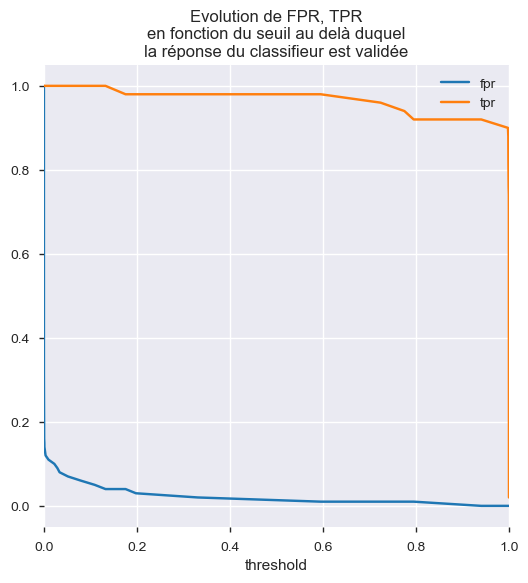

In [25]:
ax = tp.plot(x="threshold", y=['fpr', 'tpr'], figsize=(6,6))
ax.set_title("Evolution de FPR, TPR\nen fonction du seuil au delà duquel\n" + 
             "la réponse du classifieur est validée");

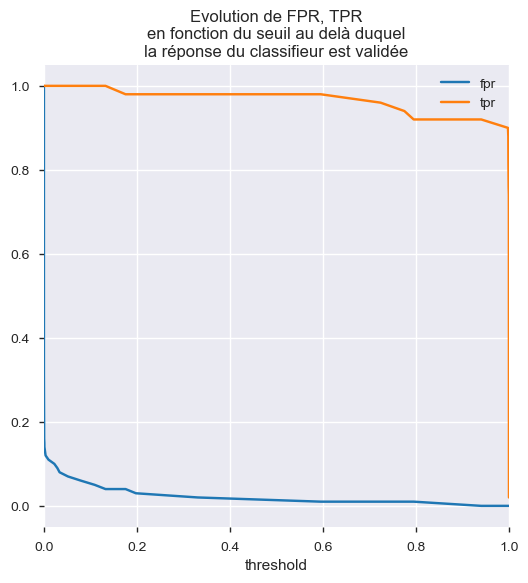

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
proba = reg_log2.predict_proba(X)
fpr1, tpr1, thresholds1 = roc_curve(y, proba[:, 1], pos_label=reg_log2.classes_[1], drop_intermediate=False)

tp = pd.DataFrame(dict(fpr=fpr1, tpr=tpr1, threshold=thresholds1))
tp.drop(0, axis=0, inplace=True) #suppression du 1er seuil fixé arbitrairement à 2

ax = tp.plot(x="threshold", y=['fpr', 'tpr'], figsize=(6,6))
ax.set_title("Evolution de FPR, TPR\nen fonction du seuil au delà duquel\n" + 
             "la réponse du classifieur est validée");

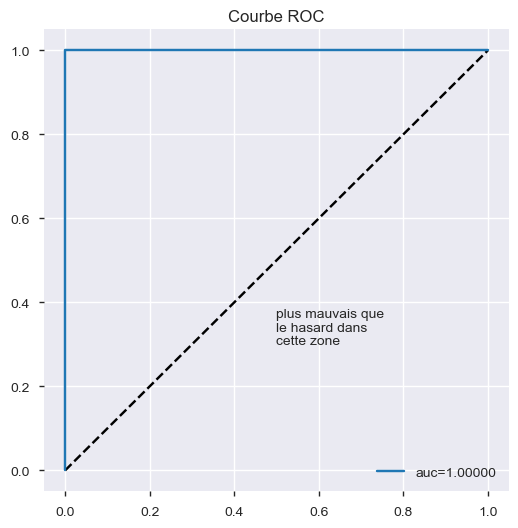

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr0, tpr0)
ax.plot(fpr0, tpr0, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC')
ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
ax.legend();